In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona as fi

In [2]:
data = pd.read_csv("clean_data.csv")
us_map = gpd.read_file("cb_2018_us_state_500k/cb_2018_us_state_500k.shp")

data.head()
us_map.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [3]:
#Where do the sighting occur the most

state = data["state"].value_counts()
display(state.head())

state
CA    7671
FL    3897
WA    2954
TX    2717
NY    2668
Name: count, dtype: int64

In [4]:
state = pd.DataFrame(state).reset_index()
state.head()

,state,count
0,CA,7671
1,FL,3897
2,WA,2954
3,TX,2717
4,NY,2668


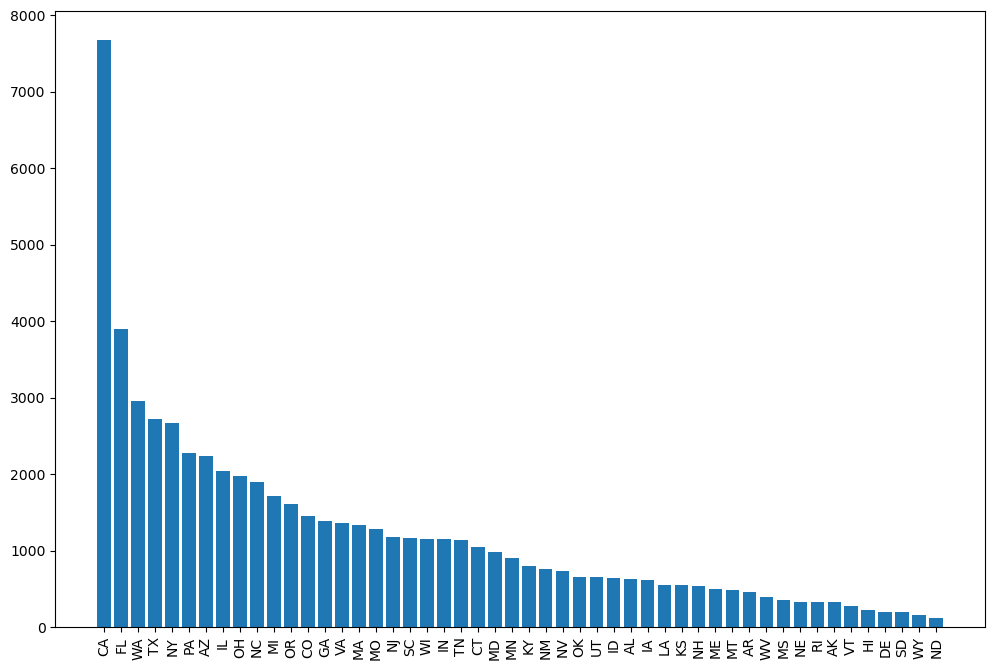

In [5]:
x_axis = state["state"]
y_axis = state["count"]

fig = plt.figure(figsize=(12, 8))
plt.bar(x_axis, y_axis)
plt.xticks(rotation = 90)
plt.tick_params(axis='x', which='major', labelsize = 10)
plt.show()

In [6]:
us_map.rename(columns = {"STUSPS": "state"}, inplace = True)
display(us_map.head())

,STATEFP,STATENS,AFFGEOID,GEOID,state,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [7]:
map_and_stats=us_map.merge(data, on="state")
map_and_stats.head()

,STATEFP,STATENS,AFFGEOID,GEOID,state,NAME,LSAD,ALAND,AWATER,geometry,Unnamed: 0,city,date_time,shape,duration,text
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",180,Purvis,2008-09-01T15:00:00,flash,1 hour,We seen black shadow figures for days and alwa...
1,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",257,Ocean Springs,2019-03-19T09:00:00,sphere,Mere Seconds,Green orb object burned out in mid air and van...
2,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",680,Starkville,2006-03-29T20:55:00,circle,12 seconds,"Silent white object spotted, then moved 2 mile..."
3,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",1576,Olive Branch,1969-06-30T00:00:00,light,5 minutes,1969 olive branch Mississippi large round ligh...
4,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",1756,Morton,2019-05-20T11:00:00,cigar,3 seconds,"I was in the red ligth in Morton, when my eyes..."


In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)

map_and_stats.plot(column="state", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
map_and_states

C:\Users\Kylez\anaconda3\envs\dev\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world